In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# Importing the 5 datasets
data_2015 = pd.read_csv("../input/world-happiness/2015.csv")
data_2016 = pd.read_csv("../input/world-happiness/2016.csv")
data_2017 = pd.read_csv("../input/world-happiness/2017.csv")
data_2018 = pd.read_csv("../input/world-happiness/2018.csv")
data_2019 = pd.read_csv("../input/world-happiness/2019.csv")

#Keeping only the columns we need
data_2015 = data_2015[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity']]
data_2016 = data_2016[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity']]
data_2017 = data_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.',
                       'Health..Life.Expectancy.', 'Freedom', 'Generosity']]
data_2018 = data_2018[['Country or region', 'Overall rank', 'Score', 'GDP per capita',
                       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity']]
data_2019 = data_2019[['Country or region', 'Overall rank', 'Score', 'GDP per capita',
                       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity']]



# Giving same names for all columns
new_columns = ['Country or Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity']

data_2015.columns = new_columns
data_2016.columns = new_columns
data_2017.columns = new_columns
data_2018.columns = new_columns
data_2019.columns = new_columns

# Adding a new column containing the year
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Merging the data together
data = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019], axis=0)
data.head(10)

,Country or Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,2015
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,2015
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,2015
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,2015
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,2015
5,Finland,6,7.406,1.29025,0.88911,0.64169,0.23351,2015
6,Netherlands,7,7.378,1.32944,0.89284,0.61576,0.47610,2015
7,Sweden,8,7.364,1.33171,0.91087,0.65980,0.36262,2015
8,New Zealand,9,7.286,1.25018,0.90837,0.63938,0.47501,2015
9,Australia,10,7.284,1.33358,0.93156,0.65124,0.43562,2015


In [3]:
print("Number of Missing Data :",data.isnull().any().any())
print(data.isnull().sum())

Number of Missing Data : False
Country or Region           0
Happiness Rank              0
Happiness Score             0
Economy (GDP per Capita)    0
Health (Life Expectancy)    0
Freedom                     0
Generosity                  0
Year                        0
dtype: int64


In [4]:
data.groupby(by='Year')['Happiness Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,5.375734,1.145010,2.839,4.52600,5.2325,6.24375,7.587
2016,157.0,5.382185,1.141674,2.905,4.40400,5.3140,6.26900,7.526
2017,155.0,5.354019,1.131230,2.693,4.50550,5.2790,6.10150,7.537
2018,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
2019,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769


In [5]:
# Groupping the values of each column for every country in different years.
cols = ['Country or Region', 'Year', 'Happiness Rank',
        'Happiness Score', 'Economy (GDP per Capita)',
        'Health (Life Expectancy)', 'Freedom', 'Generosity']
grouped_data = data.groupby(cols).mean().reset_index()
grouped_data

,Country or Region,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity
0,Afghanistan,2015,153,3.575,0.319820,0.303350,0.234140,0.365100
1,Afghanistan,2016,154,3.360,0.382270,0.173440,0.164300,0.312680
2,Afghanistan,2017,141,3.794,0.401477,0.180747,0.106180,0.311871
3,Afghanistan,2018,145,3.632,0.332000,0.255000,0.085000,0.191000
4,Afghanistan,2019,154,3.203,0.350000,0.361000,0.000000,0.158000
...,...,...,...,...,...,...,...,...
777,Zimbabwe,2015,115,4.610,0.271000,0.334750,0.258610,0.189870
778,Zimbabwe,2016,131,4.193,0.350410,0.159500,0.254290,0.185030
779,Zimbabwe,2017,138,3.875,0.375847,0.196764,0.336384,0.189143
780,Zimbabwe,2018,144,3.692,0.357000,0.248000,0.406000,0.132000


In [6]:
# Grouping the data by year and average the factors
group = data.groupby(by = 'Year')[['Happiness Score', 'Economy (GDP per Capita)',
                                     'Health (Life Expectancy)','Freedom', 'Generosity']].mean().reset_index()

# Reconstructing the data
group = pd.melt(frame = grouped_data, id_vars='Year', value_vars=['Happiness Score', 'Economy (GDP per Capita)','Health (Life Expectancy)','Freedom', 'Generosity'], var_name='Based on', value_name='Average Value')

group.head()

,Year,Based on,Average Value
0,2015,Happiness Score,3.575
1,2016,Happiness Score,3.360
2,2017,Happiness Score,3.794
3,2018,Happiness Score,3.632
4,2019,Happiness Score,3.203


[Text(0, 0, 'Money'),
 Text(1, 0, 'Health'),
 Text(2, 0, 'Freedom'),
 Text(3, 0, 'Generosity')]

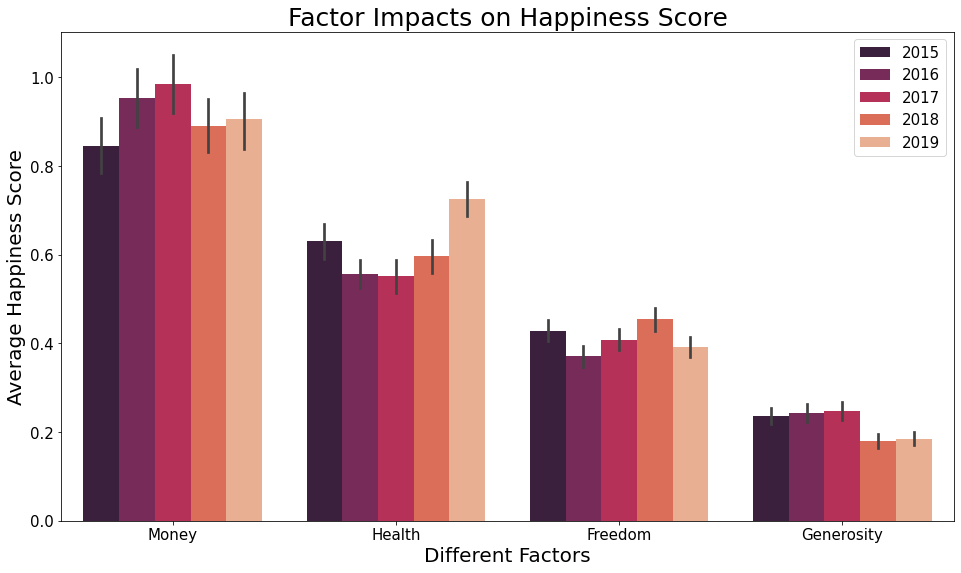

In [7]:
# Producing a bar chart showing the impacts of factors on happiness score in each year
plt.figure(figsize = (16, 9))

ax = sns.barplot(x = group[group['Based on'] != 'Happiness Score']['Based on'], y = group['Average Value'], 
            palette = 'rocket', hue = group['Year'])

plt.title("Factor Impacts on Happiness Score", fontsize = 25)
plt.xlabel("Different Factors", fontsize = 20)
plt.ylabel("Average Happiness Score", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

ax.set_xticklabels(['Money', 'Health', 'Freedom', 'Generosity'])

In [8]:
# Sorting the countries based on their average happiness score values in 2015
group_2015 = data[data['Year']==2015].groupby(by = 'Country or Region')[['Happiness Score']].mean().reset_index()


group_2015 = pd.melt(frame = group_2015, id_vars='Country or Region', value_vars=['Happiness Score'], var_name='Based on', value_name='Average Score')

group_2015 = group_2015.sort_values(by = 'Average Score', ascending = False).reset_index().head(10)
group_2015 

,index,Country or Region,Based on,Average Score
0,135,Switzerland,Happiness Score,7.587
1,58,Iceland,Happiness Score,7.561
2,37,Denmark,Happiness Score,7.527
3,105,Norway,Happiness Score,7.522
4,24,Canada,Happiness Score,7.427
5,45,Finland,Happiness Score,7.406
6,99,Netherlands,Happiness Score,7.378
7,134,Sweden,Happiness Score,7.364
8,100,New Zealand,Happiness Score,7.286
9,6,Australia,Happiness Score,7.284


In [9]:
# Sorting the countries based on their average happiness score values in 2016
group_2016 = data[data['Year']==2016].groupby(by = 'Country or Region')[['Happiness Score']].mean().reset_index()


group_2016 = pd.melt(frame = group_2016, id_vars='Country or Region', value_vars=['Happiness Score'], var_name='Based on', value_name='Average Score')

group_2016 = group_2016.sort_values(by = 'Average Score', ascending = False).reset_index().head(10)
group_2016

,index,Country or Region,Based on,Average Score
0,37,Denmark,Happiness Score,7.526
1,134,Switzerland,Happiness Score,7.509
2,57,Iceland,Happiness Score,7.501
3,103,Norway,Happiness Score,7.498
4,44,Finland,Happiness Score,7.413
5,25,Canada,Happiness Score,7.404
6,97,Netherlands,Happiness Score,7.339
7,98,New Zealand,Happiness Score,7.334
8,6,Australia,Happiness Score,7.313
9,133,Sweden,Happiness Score,7.291


In [10]:
# Sorting the countries based on their average happiness score values in 2017
group_2017 = data[data['Year']==2017].groupby(by = 'Country or Region')[['Happiness Score']].mean().reset_index()


group_2017 = pd.melt(frame = group_2017, id_vars='Country or Region', value_vars=['Happiness Score'], var_name='Based on', value_name='Average Score')

group_2017 = group_2017.sort_values(by = 'Average Score', ascending = False).reset_index().head(10)
group_2017 

,index,Country or Region,Based on,Average Score
0,104,Norway,Happiness Score,7.537
1,37,Denmark,Happiness Score,7.522
2,57,Iceland,Happiness Score,7.504
3,132,Switzerland,Happiness Score,7.494
4,44,Finland,Happiness Score,7.469
5,98,Netherlands,Happiness Score,7.377
6,25,Canada,Happiness Score,7.316
7,99,New Zealand,Happiness Score,7.314
8,6,Australia,Happiness Score,7.284
9,131,Sweden,Happiness Score,7.284


In [11]:
# Sorting the countries based on their average happiness score values in 2018
group_2018 = data[data['Year']==2018].groupby(by = 'Country or Region')[['Happiness Score']].mean().reset_index()


group_2018 = pd.melt(frame = group_2018, id_vars='Country or Region', value_vars=['Happiness Score'], var_name='Based on', value_name='Average Score')

group_2018 = group_2018.sort_values(by = 'Average Score', ascending = False).reset_index().head(10)
group_2018 

,index,Country or Region,Based on,Average Score
0,44,Finland,Happiness Score,7.632
1,105,Norway,Happiness Score,7.594
2,37,Denmark,Happiness Score,7.555
3,57,Iceland,Happiness Score,7.495
4,133,Switzerland,Happiness Score,7.487
5,99,Netherlands,Happiness Score,7.441
6,25,Canada,Happiness Score,7.328
7,100,New Zealand,Happiness Score,7.324
8,132,Sweden,Happiness Score,7.314
9,6,Australia,Happiness Score,7.272


In [12]:
# Sorting the countries based on their average happiness score values in 2019
group_2019 = data[data['Year']==2019].groupby(by = 'Country or Region')[['Happiness Score']].mean().reset_index()


group_2019 = pd.melt(frame = group_2019, id_vars='Country or Region', value_vars=['Happiness Score'], var_name='Based on', value_name='Average Score')

group_2019 = group_2015.sort_values(by = 'Average Score', ascending = False).reset_index().head(10)
group_2019 

,level_0,index,Country or Region,Based on,Average Score
0,0,135,Switzerland,Happiness Score,7.587
1,1,58,Iceland,Happiness Score,7.561
2,2,37,Denmark,Happiness Score,7.527
3,3,105,Norway,Happiness Score,7.522
4,4,24,Canada,Happiness Score,7.427
5,5,45,Finland,Happiness Score,7.406
6,6,99,Netherlands,Happiness Score,7.378
7,7,134,Sweden,Happiness Score,7.364
8,8,100,New Zealand,Happiness Score,7.286
9,9,6,Australia,Happiness Score,7.284


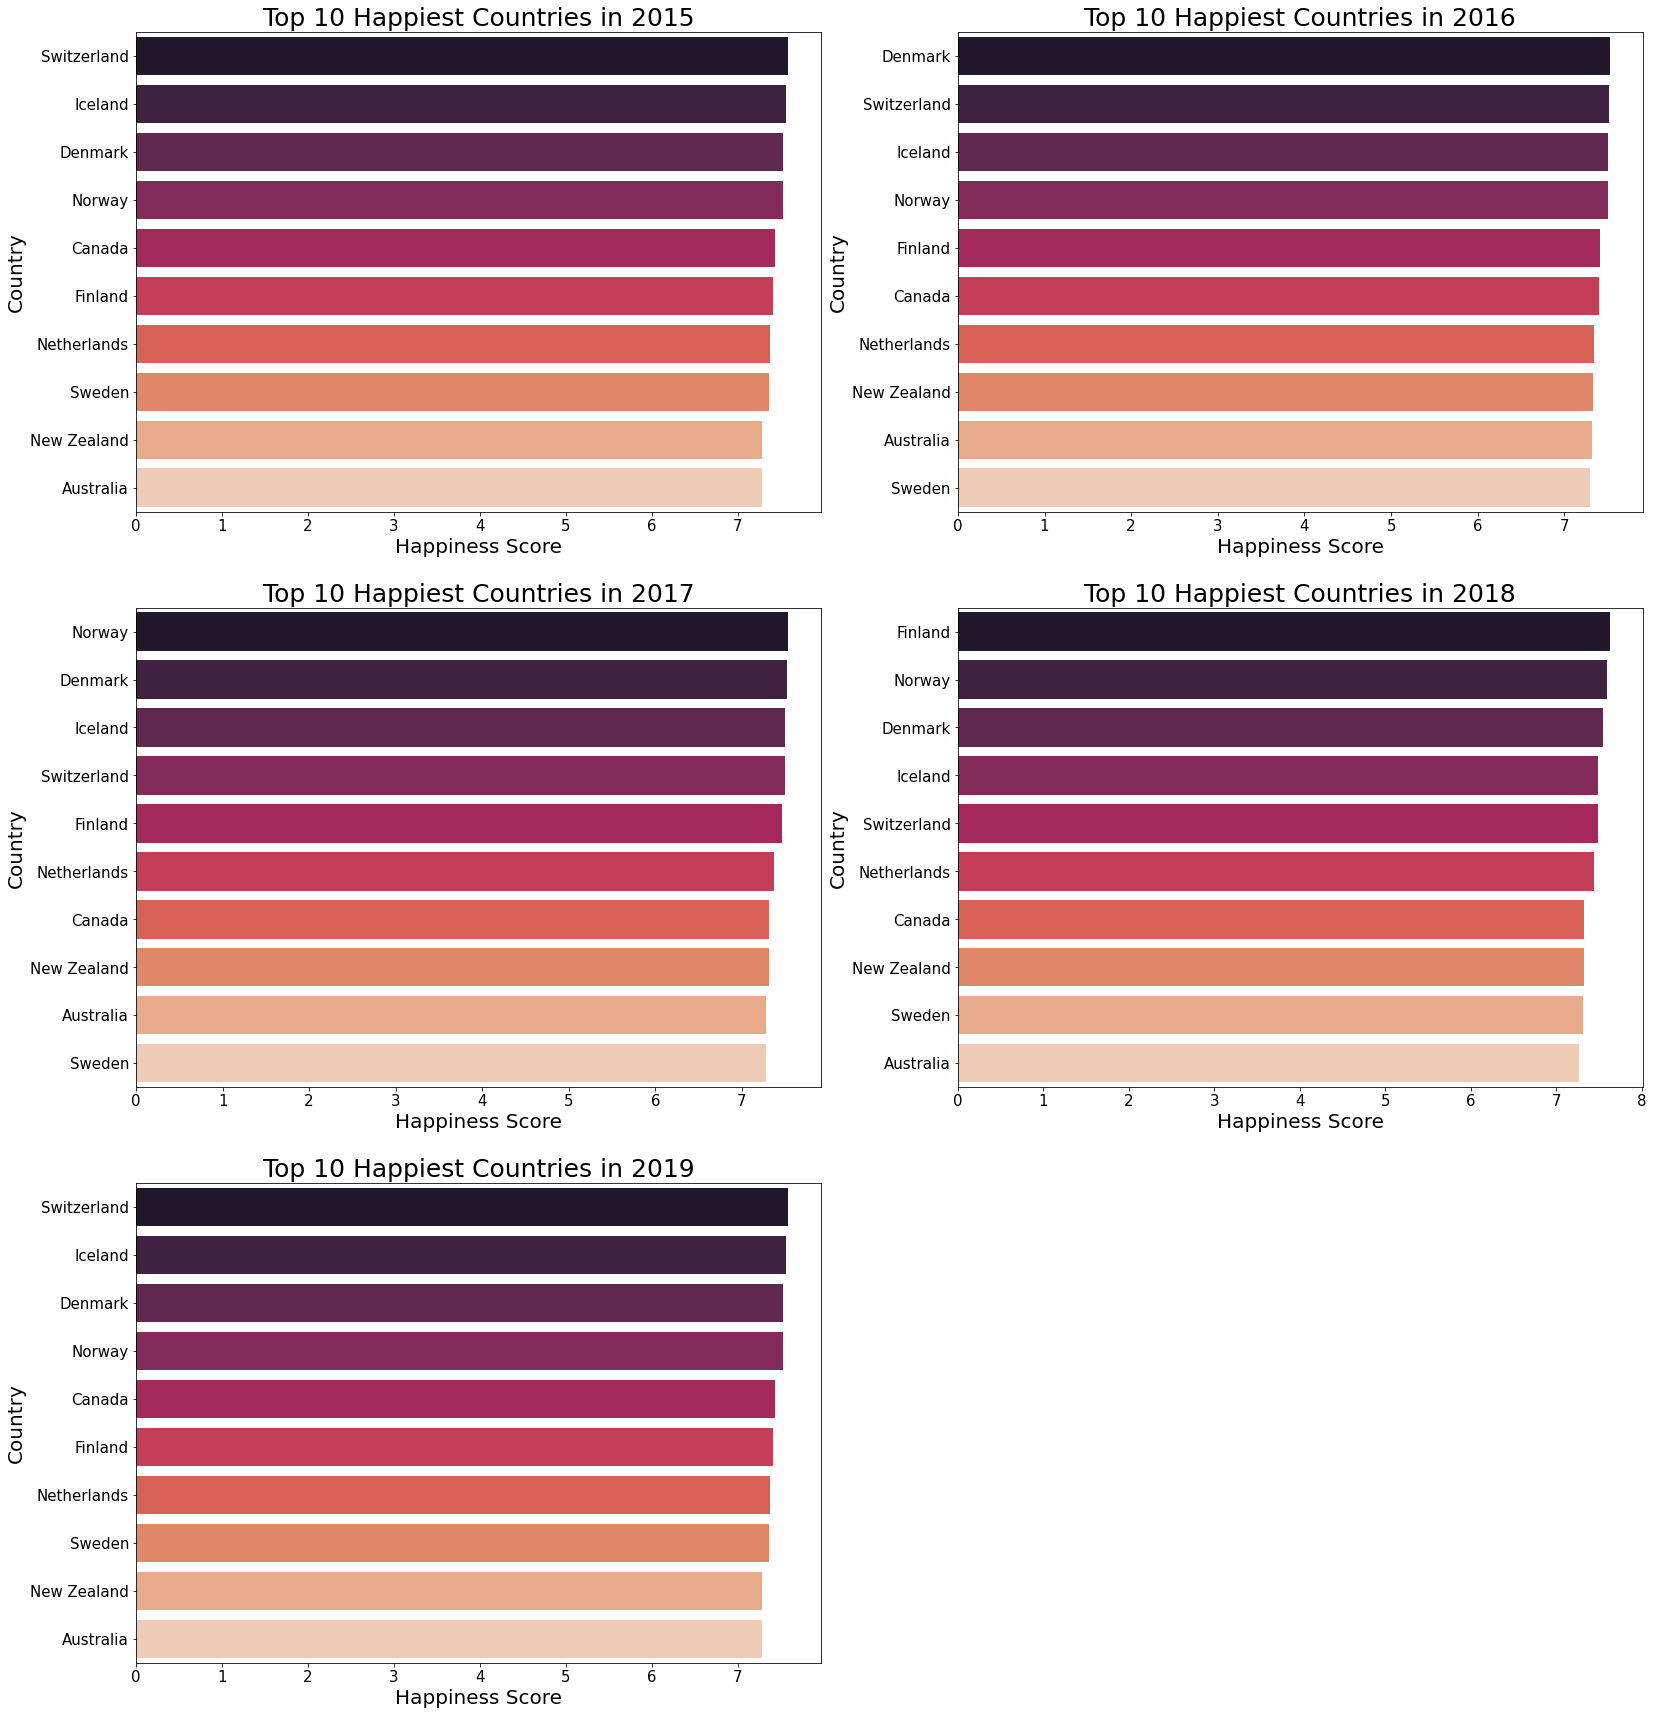

In [13]:
plt.figure(figsize = (27, 30))

plt.subplot(3,2,1)
sns.barplot(y = group_2015['Country or Region'], x = group_2015['Average Score'], palette = 'rocket')
plt.title("Top 10 Happiest Countries in 2015", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

plt.subplot(3,2,2)
sns.barplot(y = group_2016['Country or Region'], x = group_2016['Average Score'], palette = 'rocket')
plt.title("Top 10 Happiest Countries in 2016", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

plt.subplot(3,2,3)
sns.barplot(y = group_2017['Country or Region'], x = group_2017['Average Score'], palette = 'rocket')
plt.title("Top 10 Happiest Countries in 2017", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

plt.subplot(3,2,4)
sns.barplot(y = group_2018['Country or Region'], x = group_2018['Average Score'], palette = 'rocket')
plt.title("Top 10 Happiest Countries in 2018", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

plt.subplot(3,2,5)
sns.barplot(y = group_2019['Country or Region'], x = group_2019['Average Score'], palette = 'rocket')
plt.title("Top 10 Happiest Countries in 2019", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

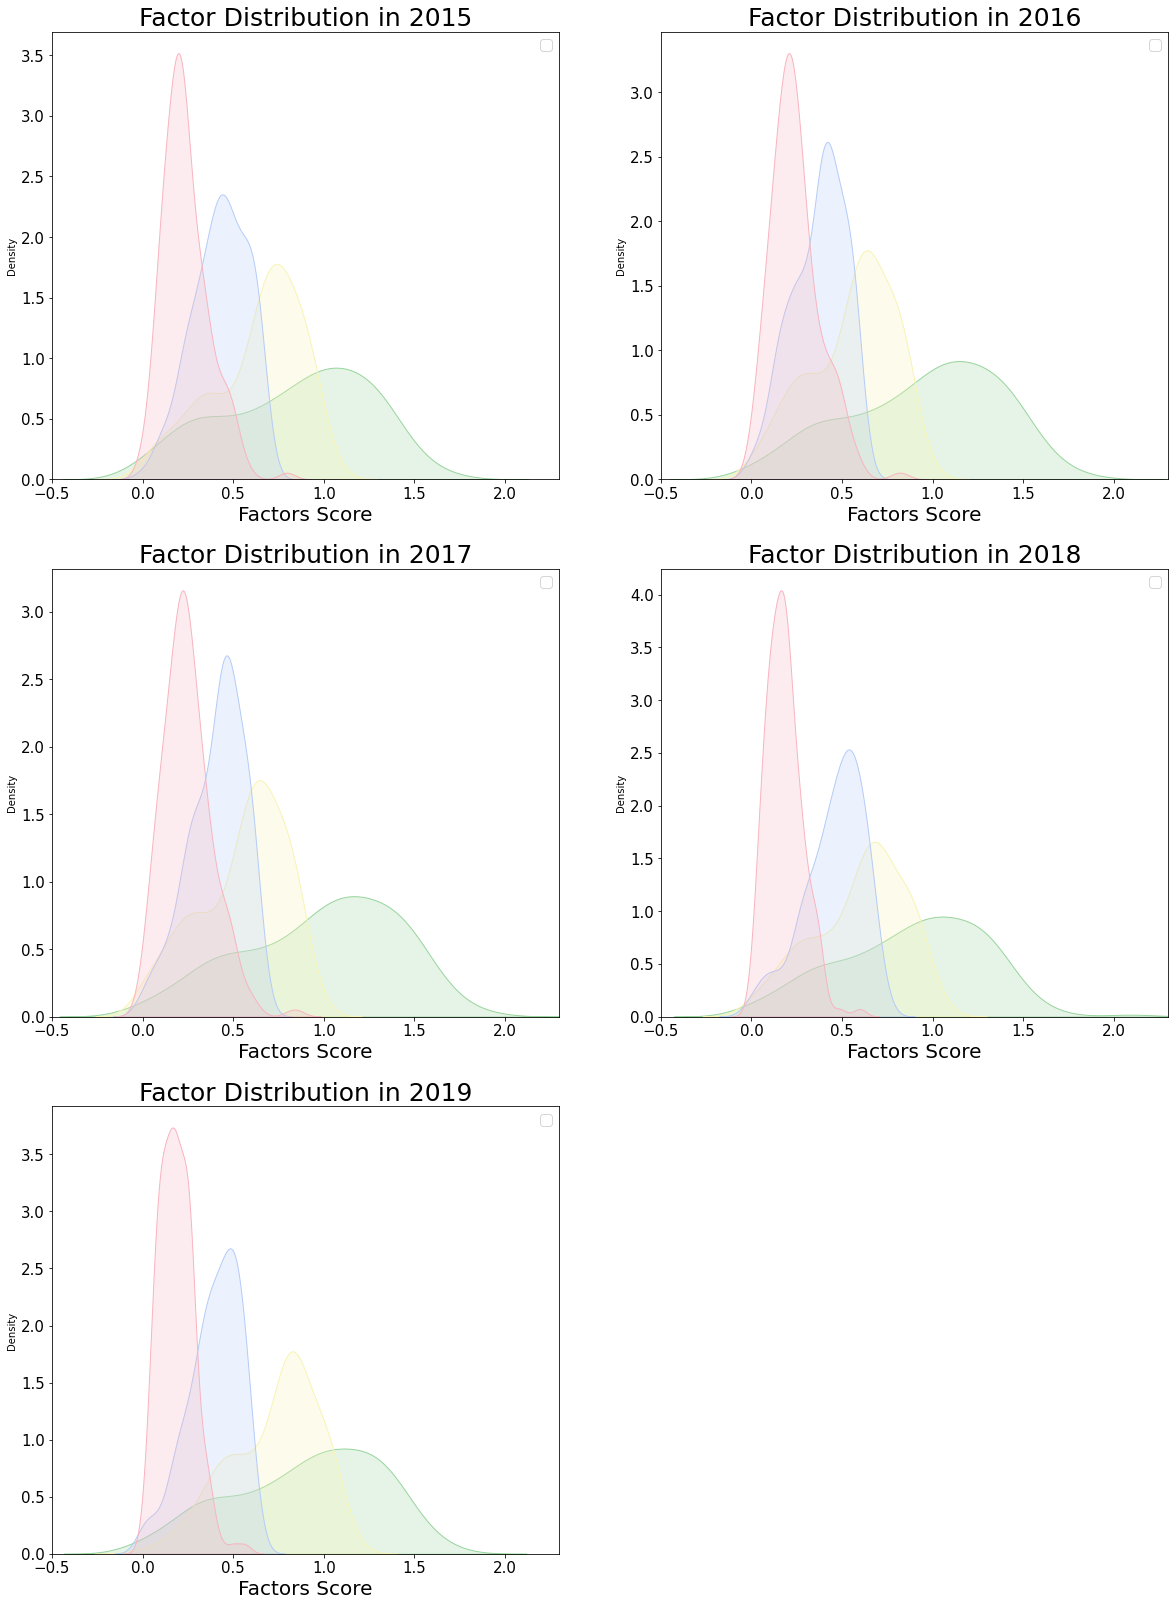

In [14]:
## Creating the grouped table
country_factors_avg15 = data[data['Year'] == 2015].groupby(by = ['Country or Region'])[['Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Generosity']].mean().reset_index()
country_factors_avg16 = data[data['Year'] == 2016].groupby(by = ['Country or Region'])[['Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Generosity']].mean().reset_index()
country_factors_avg17 = data[data['Year'] == 2017].groupby(by = ['Country or Region'])[['Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Generosity']].mean().reset_index()
country_factors_avg18 = data[data['Year'] == 2018].groupby(by = ['Country or Region'])[['Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Generosity']].mean().reset_index()
country_factors_avg19 = data[data['Year'] == 2019].groupby(by = ['Country or Region'])[['Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Generosity']].mean().reset_index()

plt.figure(figsize = (20, 28))

plt.subplot(3,2,1)
p1=sns.kdeplot(data = country_factors_avg15['Economy (GDP per Capita)'], color = "#98D59D", shade = True)
p2=sns.kdeplot(data = country_factors_avg15['Health (Life Expectancy)'], color = "#F8F4B5", shade = True)
p3=sns.kdeplot(data = country_factors_avg15['Freedom'], color = "#B5CCF8", shade = True)
p4=sns.kdeplot(data = country_factors_avg15['Generosity'], color = "#F8B5C0", shade = True)
plt.xlabel('Factors Score', fontsize = 20)
plt.title('Factor Distribution in 2015', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((-0.5, 2.3))
plt.legend(fontsize = 15);

plt.subplot(3,2,2)
sns.kdeplot(data = country_factors_avg16['Economy (GDP per Capita)'], color = "#98D59D", shade = True)
sns.kdeplot(data = country_factors_avg16['Health (Life Expectancy)'], color = "#F8F4B5", shade = True)
sns.kdeplot(data = country_factors_avg16['Freedom'], color = "#B5CCF8", shade = True)
sns.kdeplot(data = country_factors_avg16['Generosity'], color = "#F8B5C0", shade = True)
plt.xlabel('Factors Score', fontsize = 20)
plt.title('Factor Distribution in 2016', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((-0.5, 2.3))
plt.legend(fontsize = 15);

plt.subplot(3,2,3)
sns.kdeplot(data = country_factors_avg17['Economy (GDP per Capita)'], color = "#98D59D", shade = True)
sns.kdeplot(data = country_factors_avg17['Health (Life Expectancy)'], color = "#F8F4B5", shade = True)
sns.kdeplot(data = country_factors_avg17['Freedom'], color = "#B5CCF8", shade = True)
sns.kdeplot(data = country_factors_avg17['Generosity'], color = "#F8B5C0", shade = True)
plt.xlabel('Factors Score', fontsize = 20)
plt.title('Factor Distribution in 2017', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((-0.5, 2.3))
plt.legend(fontsize = 15);

plt.subplot(3,2,4)
sns.kdeplot(data = country_factors_avg18['Economy (GDP per Capita)'], color = "#98D59D", shade = True)
sns.kdeplot(data = country_factors_avg18['Health (Life Expectancy)'], color = "#F8F4B5", shade = True)
sns.kdeplot(data = country_factors_avg18['Freedom'], color = "#B5CCF8", shade = True)
sns.kdeplot(data = country_factors_avg18['Generosity'], color = "#F8B5C0", shade = True)
plt.xlabel('Factors Score', fontsize = 20)
plt.title('Factor Distribution in 2018', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((-0.5, 2.3))
plt.legend(fontsize = 15);

plt.subplot(3,2,5)
sns.kdeplot(data = country_factors_avg19['Economy (GDP per Capita)'], color = "#98D59D", shade = True)
sns.kdeplot(data = country_factors_avg19['Health (Life Expectancy)'], color = "#F8F4B5", shade = True)
sns.kdeplot(data = country_factors_avg19['Freedom'], color = "#B5CCF8", shade = True)
sns.kdeplot(data = country_factors_avg19['Generosity'], color = "#F8B5C0", shade = True)
plt.xlabel('Factors Score', fontsize = 20)
plt.title('Factor Distribution in 2019', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((-0.5, 2.3))
plt.legend(fontsize = 15);